In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
car = pd.read_csv('Car_data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
car.shape

(301, 9)

In [47]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [49]:
import seaborn as sns

Text(0.5, 1.0, 'Car Name')

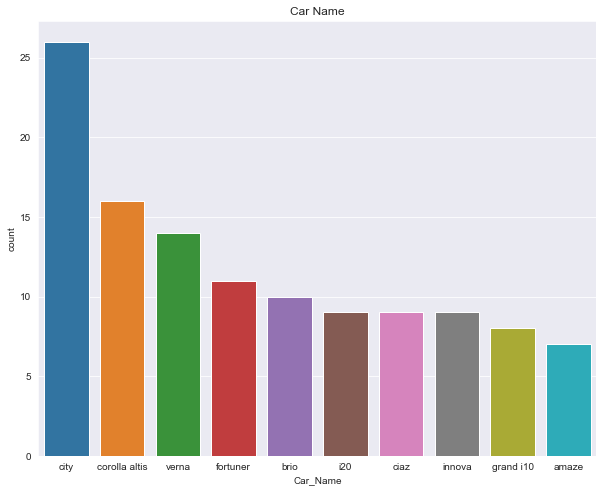

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(x='Car_Name',data=car,order=car.Car_Name.value_counts().iloc[:10].index)
plt.title('Car Name')

Text(0.5, 1.0, 'Fuel_Type')

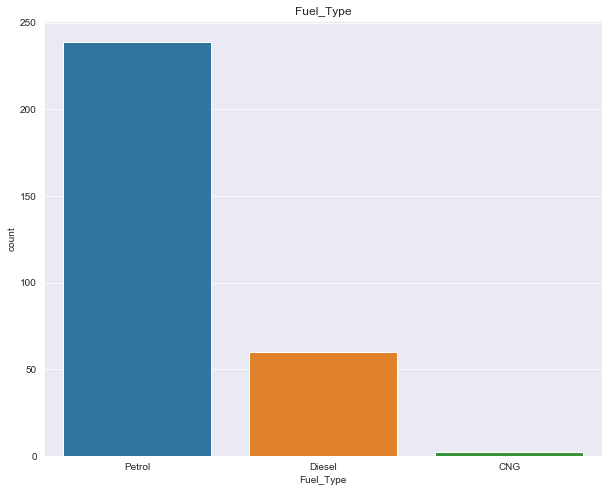

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(x='Fuel_Type',data=car,order=car.Fuel_Type.value_counts().iloc[:].index)
plt.title('Fuel_Type')

Text(0.5, 1.0, 'Seller_Type')

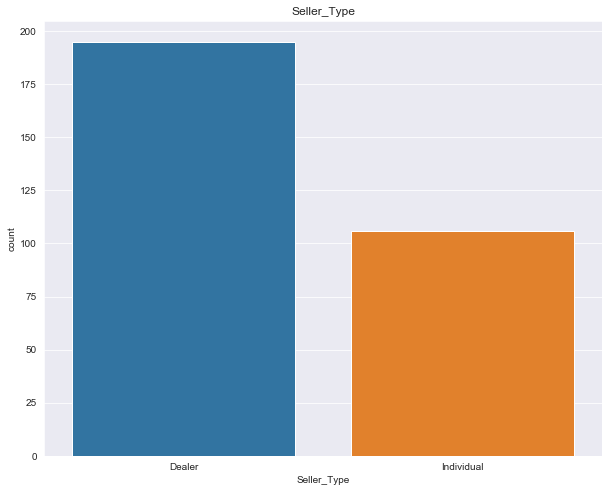

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(x='Seller_Type',data=car,order=car.Seller_Type.value_counts().iloc[:].index)
plt.title('Seller_Type')

Text(0.5, 1.0, 'Transmission')

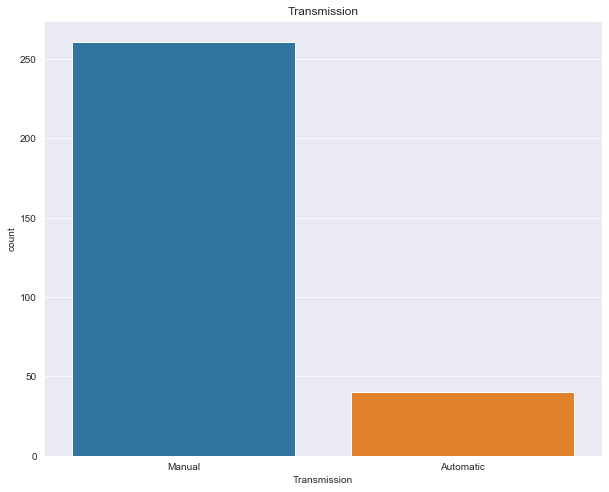

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(x='Transmission',data=car,order=car.Transmission.value_counts().iloc[:].index)
plt.title('Transmission')

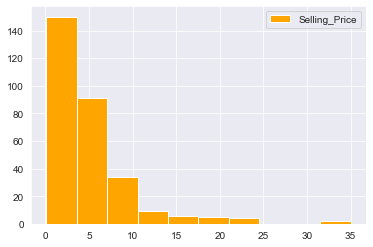

In [54]:
selling_price = car.Selling_Price
plt.hist(selling_price,label='Selling_Price',color='orange')
sns.set_style('darkgrid')
plt.legend()
plt.show()


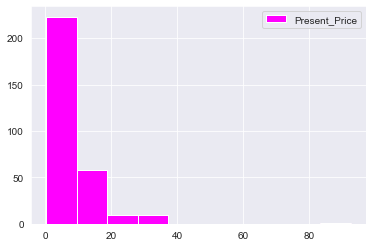

In [55]:
present_price = car.Present_Price
plt.hist(present_price,label='Present_Price',color='magenta')
sns.set_style('darkgrid')
plt.legend()
plt.show()

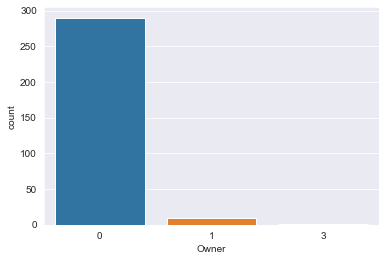

In [56]:
sns.countplot(x='Owner',data=car)

In [57]:
car.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

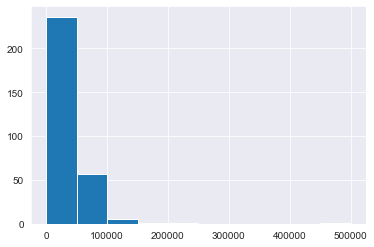

In [58]:
car.Kms_Driven.hist()

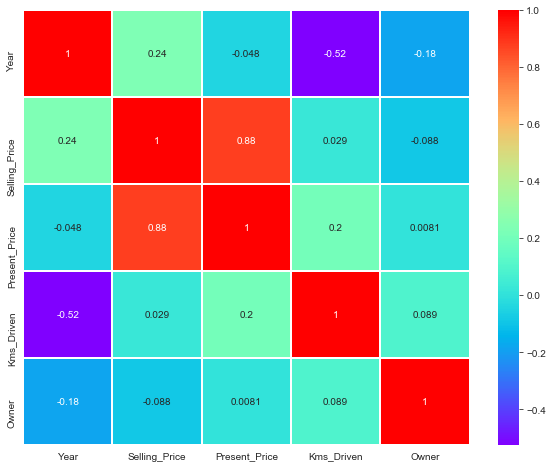

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(car.corr(),annot=True,cmap='rainbow',linewidths=1)

In [60]:
y = car[['Selling_Price']]
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [61]:
car.drop('Selling_Price',axis=1,inplace=True)

In [62]:
car.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [63]:
car.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [64]:
car.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [65]:
car.Fuel_Type.replace({'Petrol':0, 'Diesel':1, 'CNG':2},inplace=True)
car.Transmission.replace({'Manual':0, 'Automatic':1},inplace=True)
car.Seller_Type.replace({'Dealer':0, 'Individual':1},inplace=True)

In [67]:
car_name = pd.get_dummies(car.Car_Name,drop_first=True)

In [73]:
X = pd.concat([car,car_name],axis=1)

In [74]:
X.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Activa 3g,Activa 4g,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,ritz,2014,5.59,27000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,sx4,2013,9.54,43000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ciaz,2017,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wagon r,2011,4.15,5200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,swift,2014,6.87,42450,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
X.drop('Car_Name',axis=1,inplace=True)

In [76]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Activa 3g,Activa 4g,Bajaj ct 100,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,2014,5.59,27000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,9.54,43000,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,9.85,6900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,4.15,5200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,6.87,42450,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [80]:
regression = LinearRegression().fit(X_train,y_train)

In [81]:
y_predict = regression.predict(X_test)

In [82]:
print('Mean squared error :',mean_squared_error(y_test,y_predict))
print('Mean absolute error :',mean_absolute_error(y_test,y_predict))
print('Root mean squated error :',np.sqrt(mean_squared_error(y_test,y_predict)))
print('R square is :',r2_score(y_test,y_predict))

Mean squared error : 4.558464684445507
Mean absolute error : 1.2055536442077015
Root mean squated error : 2.135056131450765
R square is : 0.8296027601318544


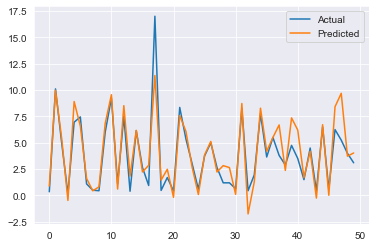

In [85]:
pd.DataFrame({'Actual':y_test[:50].values.flatten(),'Predicted':y_predict[:50].flatten()}).plot()

## Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
RF = RandomForestRegressor().fit(X_train,y_train)

In [88]:
RF_predict = RF.predict(X_test)

In [89]:
print('Mean squared error :',mean_squared_error(y_test,RF_predict))
print('Mean absolute error :',mean_absolute_error(y_test,RF_predict))
print('Root mean squated error :',np.sqrt(mean_squared_error(y_test,RF_predict)))
print('R square is :',r2_score(y_test,RF_predict))

Mean squared error : 1.1748524506000007
Mean absolute error : 0.6507440000000001
Root mean squated error : 1.083906107834069
R square is : 0.9560835437603223


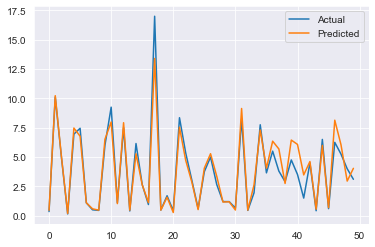

In [90]:
pd.DataFrame({'Actual':y_test[:50].values.flatten(),'Predicted':RF_predict[:50].flatten()}).plot()

## Key Point

1.Random Forest Regressor is performing better than linear regression